In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy.spatial import distance
set_matplotlib_formats('svg')
%matplotlib inline
plt.rcParams["axes.labelsize"] = 14.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [8., 5.]

In [2]:
import os

stats = {}
time = {}
nodes = {}
for root, dirs, files in os.walk('../artifacts'):
    for name in files:
        path = root.split('/') 
        if len(path) == 4:
            algo, map_type = path[-2:]
            if algo not in stats:
                stats[algo] = {}
                time[algo] = {}
                nodes[algo] = {}
            if map_type not in stats[algo]:
                stats[algo][map_type] = np.array([])
                nodes[algo][map_type] = np.array([])
            with open(os.path.join(root, name)) as f:
                if name == 'time':
                    time[algo][map_type] = int(f.readline().strip().split()[2])
                    continue
                lines = f.readlines()
                for i, line in enumerate(lines[::2]):
                    path = list(map(int, line.strip().split()))
                    nodes_cnt = int(lines[2 * i + 1].strip().split()[2])
                    xs, ys = path[::2], path[1::2]
                    path_len = np.sum([distance.euclidean([x, y], 
                                                         [xs[i + 1], ys[i + 1]]) 
                                      for i, (x, y) in enumerate(list(zip(xs, ys))[:-1])])
                    stats[algo][map_type] = np.append(stats[algo][map_type], path_len)
                    nodes[algo][map_type] = np.append(nodes[algo][map_type], nodes_cnt)

In [3]:
mapes = {}
for algo in stats:
    mapes[algo] = {}
    for m in stats[algo]:
        res, anya = stats[algo][m], stats['anya'][m]
        mapes[algo][m] = 100 * (np.mean(np.divide(res, anya, out=np.ones(anya.shape[0]), where=anya!=0)) - 1)

[5.850355813433539, 2.8579145762613667, 2.150628201427862, 1.9382543463128954, 0.0, 1.8382842482604023]


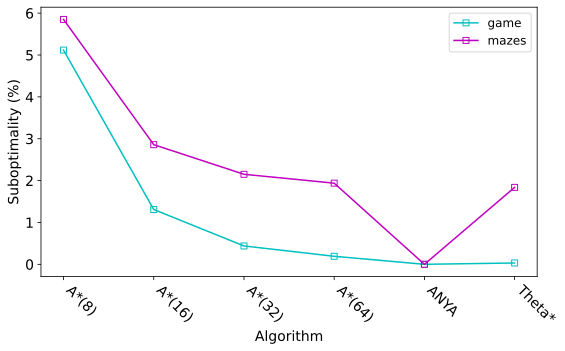

In [4]:
label = ['A*(8)', 'A*(16)', 'A*(32)', 'A*(64)', 'ANYA', 'Theta*']
y_maze = [mapes[algo]['maze'] for algo in ['2k_2.euclidian', '2k_3.euclidian', '2k_4.euclidian', '2k_5.euclidian', 'anya', 'theta.euclidian']]
y_warcraft = [mapes[algo]['my-life-for-the-horde'] for algo in ['2k_2.euclidian', '2k_3.euclidian', '2k_4.euclidian', '2k_5.euclidian', 'anya', 'theta.euclidian']]
print(y_maze)

plt.xticks(rotation=270+45, ha='left')
plt.plot(label, y_warcraft, 's-c', markerfacecolor='none')
plt.plot(label, y_maze, 's-m', markerfacecolor='none')
plt.legend(['game', 'mazes'])
plt.xlabel('Algorithm')
plt.ylabel('Suboptimality (%)')
plt.tight_layout()
plt.savefig('suboptimality')

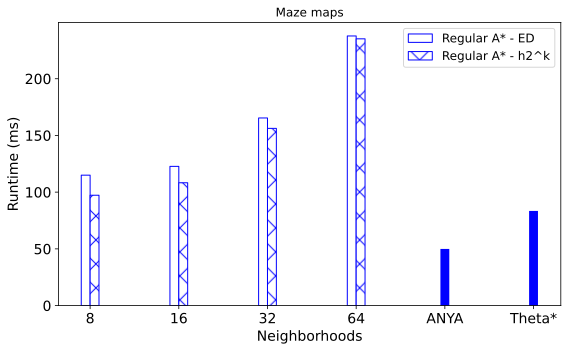

In [5]:
label = ['8', '16', '32', '64', 'ANYA', 'Theta*']
y_maze_ed = [time[algo]['maze'] / 1e8 for algo in ['2k_2.euclidian', '2k_3.euclidian', '2k_4.euclidian', '2k_5.euclidian']]
y_maze_h2k = [time[algo]['maze'] / 1e8 for algo in ['2k_2.h2_3', '2k_3.h2_4', '2k_4.h2_5', '2k_5.h2_6']]
y_maze = [time[algo]['maze'] / 1e8 for algo in ['anya', 'theta.euclidian']]

width = 0.1
plt.bar(np.arange(1, 5) - width / 2, y_maze_ed, width, label='Regular A* - ED', color='w', edgecolor='b', hatch='')
plt.bar(np.arange(1, 5) + width / 2, y_maze_h2k, width, label='Regular A* - h2^k', color='w', edgecolor='b', hatch='x')
plt.bar(np.arange(5, 7), y_maze, width, color='b')
plt.xticks(np.arange(1, 7), label)
plt.legend()
plt.xlabel('Neighborhoods')
plt.ylabel('Runtime (ms)')
plt.title('Maze maps')
plt.tight_layout()
plt.savefig('maze_time')

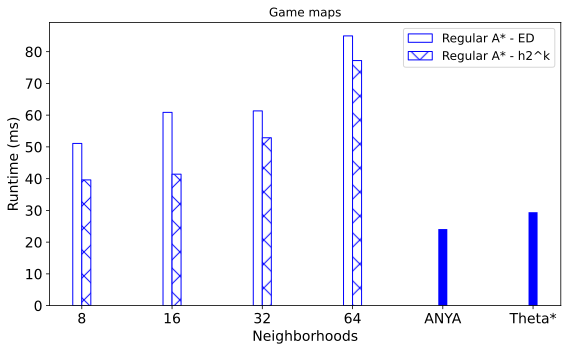

In [6]:
label = ['8', '16', '32', '64', 'ANYA', 'Theta*']
y_game_ed = [time[algo]['my-life-for-the-horde'] / 1e8 for algo in ['2k_2.euclidian', '2k_3.euclidian', '2k_4.euclidian', '2k_5.euclidian']]
y_game_h2k = [time[algo]['my-life-for-the-horde'] / 1e8 for algo in ['2k_2.h2_3', '2k_3.h2_4', '2k_4.h2_5', '2k_5.h2_6']]
y_game = [time[algo]['my-life-for-the-horde'] / 1e8 for algo in ['anya', 'theta.euclidian']]

width = 0.1
plt.bar(np.arange(1, 5) - width / 2, y_game_ed, width, label='Regular A* - ED', color='w', edgecolor='b', hatch='')
plt.bar(np.arange(1, 5) + width / 2, y_game_h2k, width, label='Regular A* - h2^k', color='w', edgecolor='b', hatch='x')
plt.bar(np.arange(5, 7), y_game, width, color='b')
plt.xticks(np.arange(1, 7), label)
plt.legend()
plt.xlabel('Neighborhoods')
plt.ylabel('Runtime (ms)')
plt.title('Game maps')
plt.tight_layout()
plt.savefig('game_time')

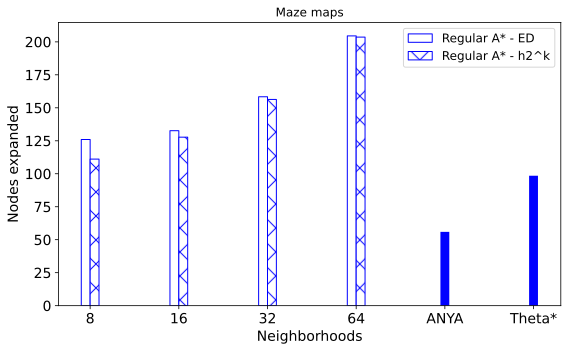

In [7]:
label = ['8', '16', '32', '64', 'ANYA', 'Theta*']
y_maze_ed = [np.mean(nodes[algo]['maze']) for algo in ['2k_2.euclidian', '2k_3.euclidian', '2k_4.euclidian', '2k_5.euclidian']]
y_maze_h2k = [np.mean(nodes[algo]['maze']) for algo in ['2k_2.h2_3', '2k_3.h2_4', '2k_4.h2_5', '2k_5.h2_6']]
y_maze = [np.mean(nodes[algo]['maze']) for algo in ['anya', 'theta.euclidian']]

width = 0.1
plt.bar(np.arange(1, 5) - width / 2, y_maze_ed, width, label='Regular A* - ED', color='w', edgecolor='b', hatch='')
plt.bar(np.arange(1, 5) + width / 2, y_maze_h2k, width, label='Regular A* - h2^k', color='w', edgecolor='b', hatch='x')
plt.bar(np.arange(5, 7), y_maze, width, color='b')
plt.xticks(np.arange(1, 7), label)
plt.legend()
plt.xlabel('Neighborhoods')
plt.ylabel('Nodes expanded')
plt.title('Maze maps')
plt.tight_layout()
plt.savefig('maze_nodes')

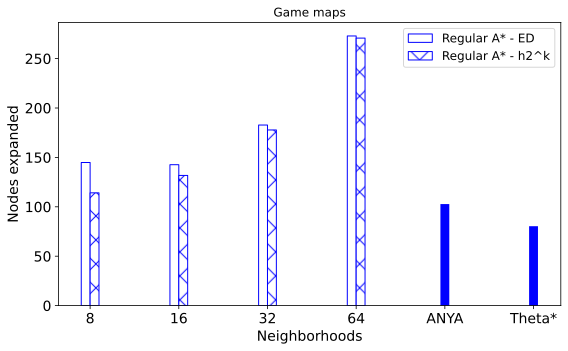

In [8]:
label = ['8', '16', '32', '64', 'ANYA', 'Theta*']
y_game_ed = [np.mean(nodes[algo]['my-life-for-the-horde']) for algo in ['2k_2.euclidian', '2k_3.euclidian', '2k_4.euclidian', '2k_5.euclidian']]
y_game_h2k = [np.mean(nodes[algo]['my-life-for-the-horde']) for algo in ['2k_2.h2_3', '2k_3.h2_4', '2k_4.h2_5', '2k_5.h2_6']]
y_game = [np.mean(nodes[algo]['my-life-for-the-horde']) for algo in ['anya', 'theta.euclidian']]

width = 0.1
plt.bar(np.arange(1, 5) - width / 2, y_game_ed, width, label='Regular A* - ED', color='w', edgecolor='b', hatch='')
plt.bar(np.arange(1, 5) + width / 2, y_game_h2k, width, label='Regular A* - h2^k', color='w', edgecolor='b', hatch='x')
plt.bar(np.arange(5, 7), y_game, width, color='b')
plt.xticks(np.arange(1, 7), label)
plt.legend()
plt.xlabel('Neighborhoods')
plt.ylabel('Nodes expanded')
plt.title('Game maps')
plt.tight_layout()
plt.savefig('game_nodes')